UNEMPLOYMENT ANALYSIS WITH PYTHON

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
import plotly.express as px

In [ ]:
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
#Number of rows in the dataframe
len(data.index)

267

Data Pre Processing

In [ ]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
mask = False
for col in data.columns: 
    mask = mask | data[col].isnull()
datanulls = data[mask]
datanulls

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude


In [ ]:
new_list=datanulls.index.values.tolist()
len(new_list)


0

In [ ]:
for i in new_list:
  data.drop([i], inplace = True)


In [ ]:
print(data.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
data.duplicated().sum()


0

Data Visualization

<BarContainer object of 267 artists>

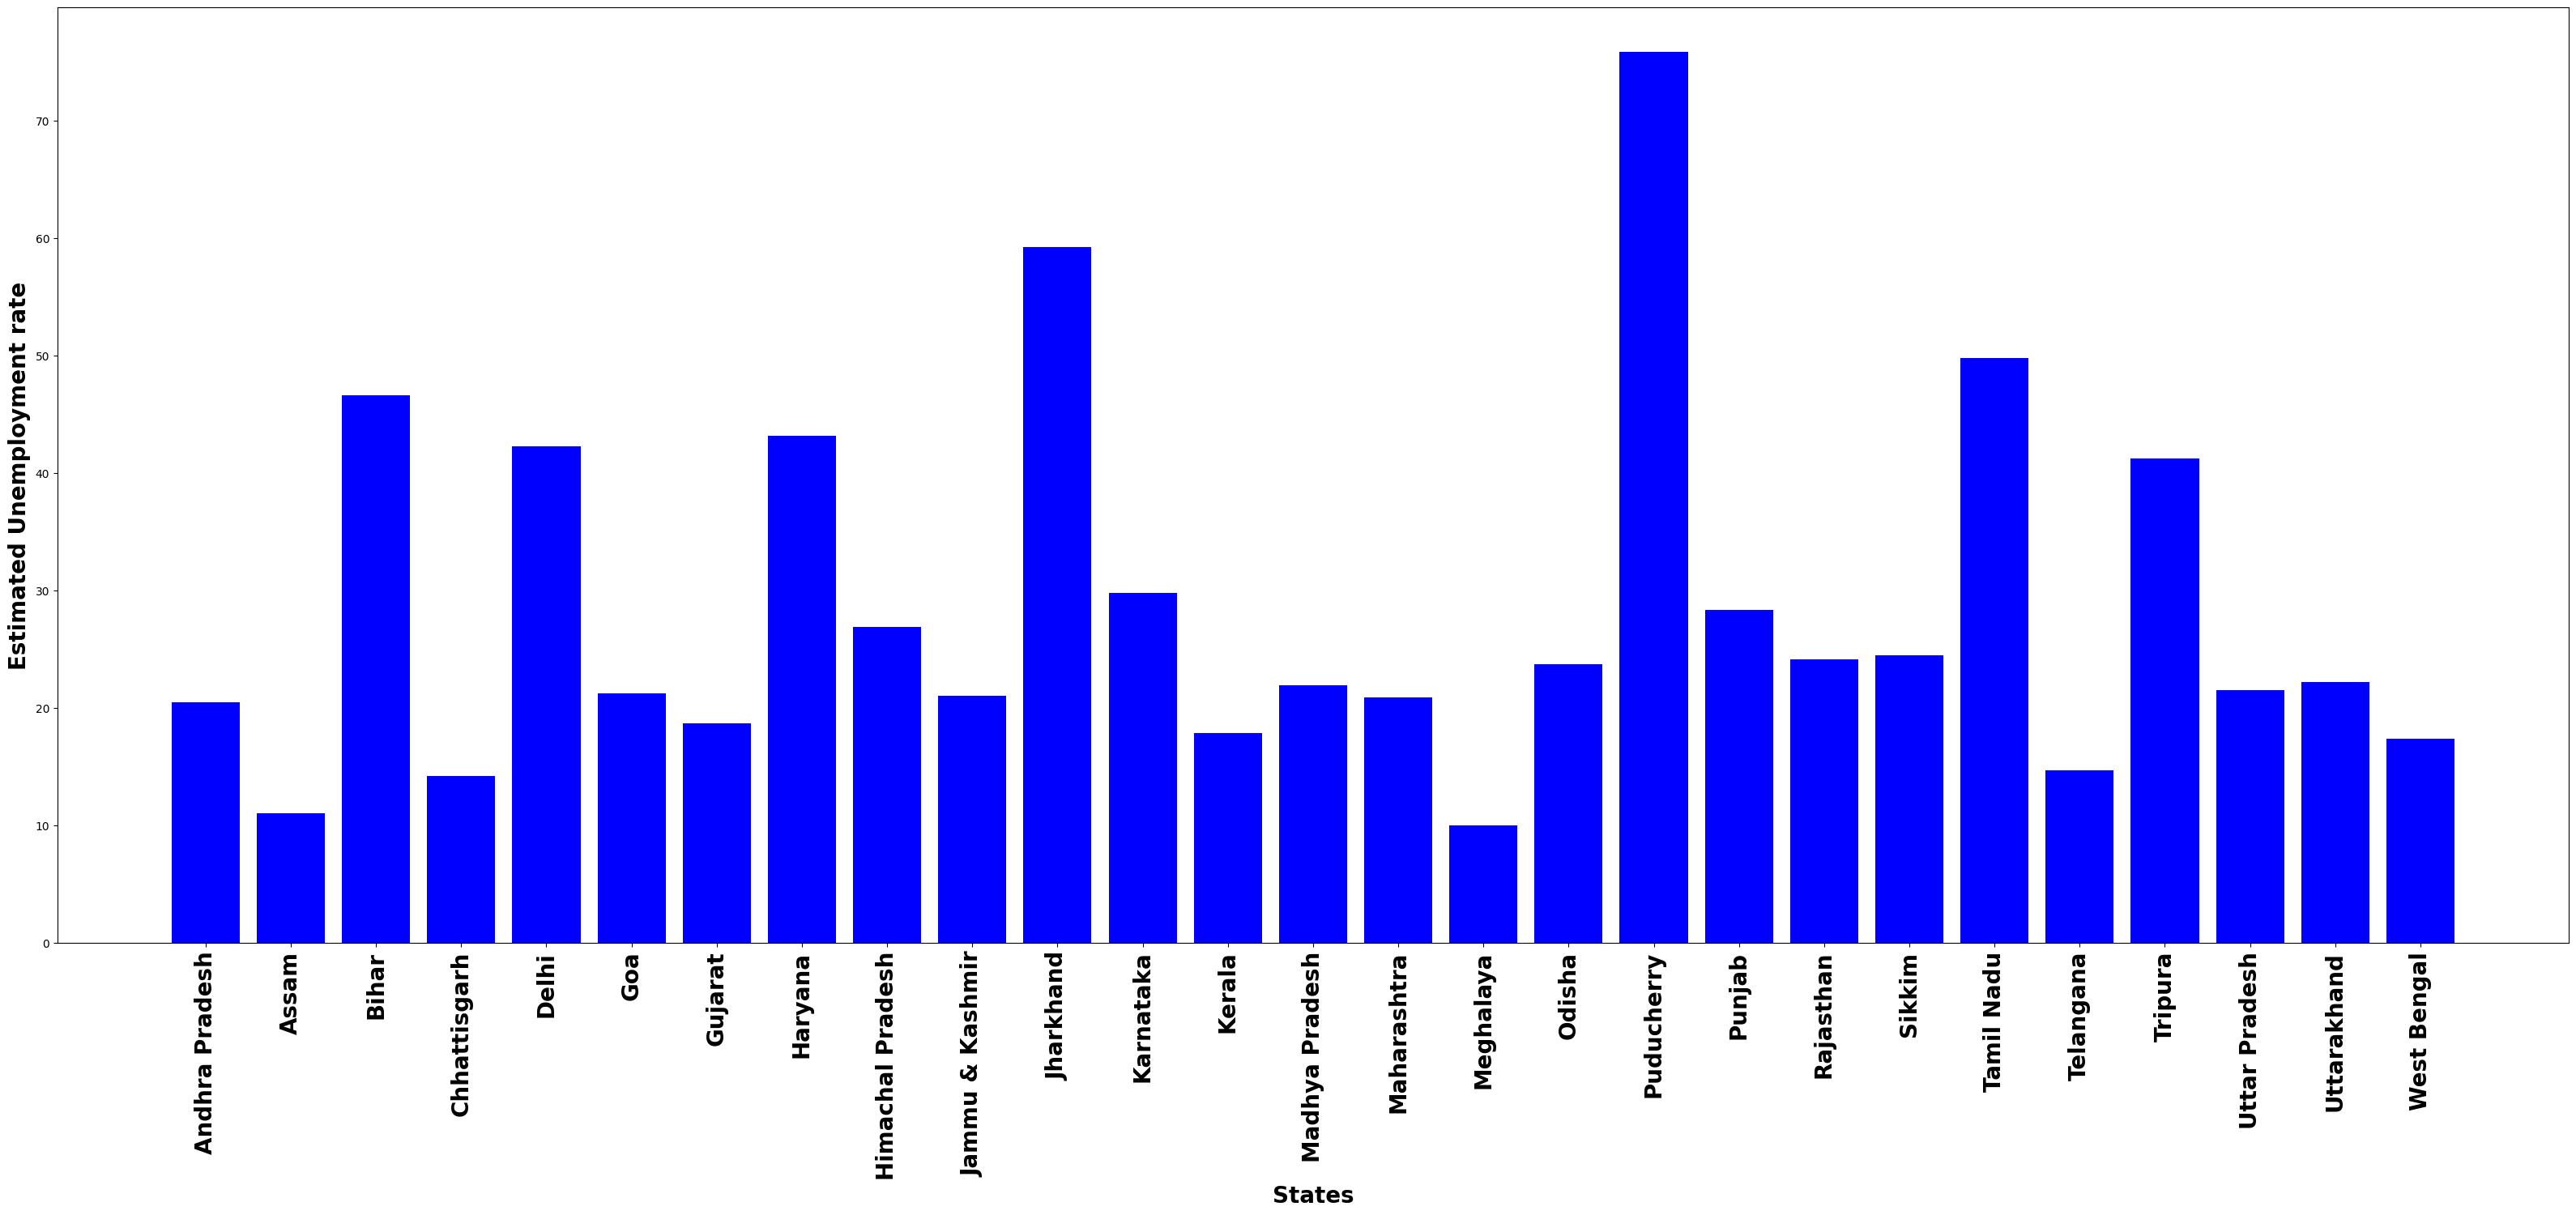

In [ ]:
data=pd.DataFrame(data)
y=data[' Estimated Unemployment Rate (%)']
x=data['Region']
pr= pt.figure(figsize=(40, 15))
pt.xlabel("States",fontweight='bold',fontsize=20)
pt.ylabel("Estimated Unemployment rate",fontweight='bold',fontsize=20)
pt.xticks(fontweight='bold',rotation='vertical',fontsize=20)
pt.bar(x,y, color='b',align='center')

In [ ]:
u_emp= data[['Region',' Estimated Unemployment Rate (%)']].groupby('Region').sum().sort_values(by=' Estimated Unemployment Rate (%)', ascending =False)
u_emp

,Estimated Unemployment Rate (%)
Region,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


### Unemployement rate

In [ ]:
import plotly.express as pl
unemp_data= data[["Region",' Estimated Unemployment Rate (%)']]
figure= pl.sunburst(unemp_data, path=["Region"],values=' Estimated Unemployment Rate (%)',width=700, height=700, color_continuous_scale="Rdy1Gn",title="Rate of unemployment in India")
figure.show()

### Heatmap

<ipython-input-45-937b25bc134e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



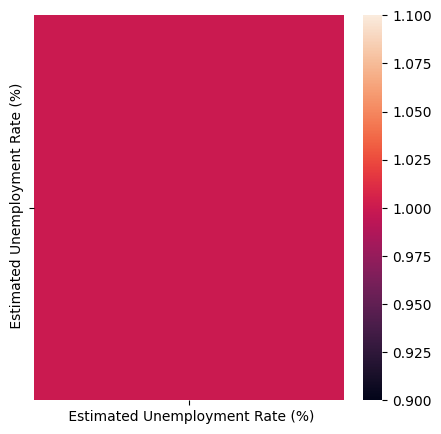

In [ ]:
pt.figure(figsize=(5,5))
sb.heatmap(unemp_data.corr())
pt.show()

### State wise unemployemnt rate

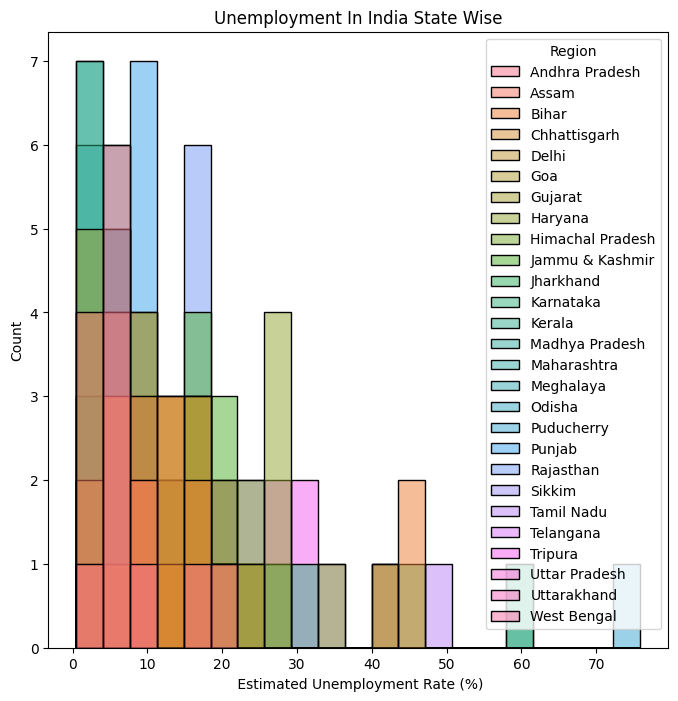

In [ ]:
pt.figure(figsize=(8,8))
pt.title('Unemployment In India State Wise')
sb.histplot(x=' Estimated Unemployment Rate (%)', hue="Region", data=unemp_data)
pt.show()